# Airline Data Analysis with `iloc` and `loc`

This notebook will guide you through analyzing airline flight data using Pandas in Python. 
You'll learn how to:

- Read a dataset into a Pandas DataFrame
- Extract data using `.iloc` and `.loc`
- Use indexed slicing to select subsets of data
- Perform calculations like summing up values in columns
- Use `.groupby()` for aggregation
- Find unique destinations and departures
- Apply conditional filtering with `.loc`

Let's get started!


## Step 1: Load the Data

We'll create a DataFrame from a dictionary representing airline flight counts between airports for specific dates.

### Sample Dataset

| From | To  | 01/04/22 | 02/04/22 | 03/04/22 | ... | 30/04/22 |
|------|-----|---------|---------|---------|-----|---------|
| DUB  | LHR | 154     | 159     | 158     | ... | 138     |

### Load into Pandas


In [4]:
import pandas as pd

# OR we can just read in the CSV file
df = pd.read_csv("Task3_data_November 22.csv")
# See the head of the data to understand it
df.head() 

,From,To,01/04/22,02/04/22,03/04/22,04/04/22,05/04/22,06/04/22,07/04/22,08/04/22,...,21/04/22,22/04/22,23/04/22,24/04/22,25/04/22,26/04/22,27/04/22,28/04/22,29/04/22,30/04/22
0,DUB,LHR,154,159,158,95,125,106,111,134,...,123,102,90,108,160,128,117,118,99,138
1,DUB,LHR,160,98,155,105,152,89,156,95,...,141,130,122,110,139,122,132,113,125,122
2,DUB,LHR,110,110,115,127,109,140,96,143,...,147,157,127,95,123,107,125,121,106,113
3,DUB,LHR,86,91,111,103,134,114,114,126,...,100,144,125,92,87,105,159,158,105,121
4,DUB,LTN,95,107,86,129,108,105,136,138,...,126,100,134,93,139,157,154,129,160,151


## Step 2: Extracting Data Using `.iloc` and `.loc`

`.iloc[]` is used for **position-based** indexing (row and column numbers).  
`.loc[]` is used for **label-based** indexing (row labels and column names).


02/04/22    357
03/04/22    400
04/04/22    477
05/04/22    323
06/04/22    397
07/04/22    372
08/04/22    479
09/04/22    345
10/04/22    337
dtype: int64


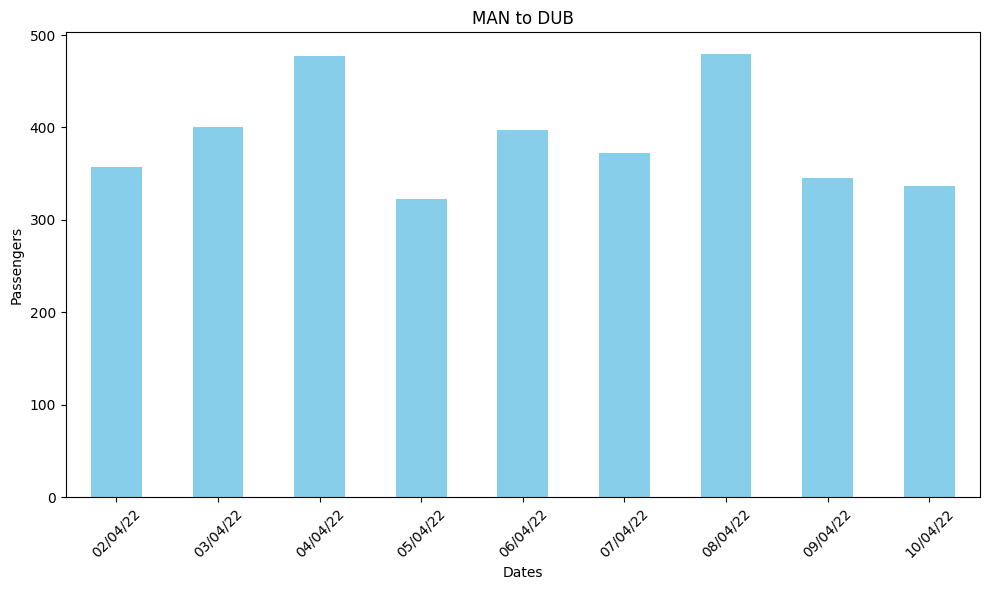

In [8]:
# Using iloc to select the first row and first three columns
# df.iloc[0,1]
# df.iloc[0, 2:] #this is the first row (0) and every column from beginning to row 3

# Can you select row 0 to 2 and columns from 2 to the end (so missing out the from and to columns)
# df.iloc[0:2,2:]

# Using loc to select the same by column names
# df['From']
# df['To']


# df.iloc[0,:3]
# df.loc[0, ["From", "To", "01/04/22"]]

# # How can i print the first 3 rows and the columns From To and 01/04/2022 and 02/04/2022
# df.loc[0:3,["From", "To", "01/04/22","02/04/22"]]

# df.iloc[0:3,-3:]

# Can you select row 0 to 2 and columns from 2 to the end (so missing out the from and to columns)

#You can print columns like this
# print(df['From'])

#Can you print the To column


#Can you print a date column


# We can use loc to filter for flights From LHR 
# filtered = df.loc[(df['From'] == 'LHR')]
# print(filtered)

# WE can combine conditions too
# dep = "LHR"
# dest = "DUB"
# filtered = df.loc[(df['From'] == dep) & (df['To'] == dest)]
# print(filtered)

# startDate = "02/04/22"
# endDate = "10/04/22"
# # print(filtered)
# date_filtered = filtered.loc[:,startDate:endDate]
# print(date_filtered)

# # Filter the dates for the first row from 02/04/22 till 10/04/22
# df.loc[0,"01/04/22":"06/04/22"]

# Can you select the first 5 rows for date 03/04/22 till 10/04/22


# What would filter flights from Dublin to Glasgow
# def filterflight():
#     try:

#         return filtered2, dep2, dest2
#     except Exception as e:
#         print(e)
# filtered, dep, dest = filterflight()


dep = input("Enter departure")
dest = input("Enter Destination")
filtered = df.loc[(df['From'] == dep) & (df['To'] == dest)]

startDate = "02/04/22"
endDate = "10/04/22"
filtered_dates = filtered.loc[:,startDate:endDate]
# Sum the columns
summed_dates = filtered_dates.sum()
print(summed_dates)

# Mean of columns
filtered_dates.mean()


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# Assuming the index of extracted_data represents the date labels,
# or you could map the data to appropriate dates if available.
summed_dates.plot(kind='bar', color='skyblue')
plt.xlabel("Dates")
plt.ylabel("Passengers")
plt.title(f"{dep} to {dest}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step 3: Indexed Slicing

We can select multiple columns or rows using slicing.


In [13]:
#What does this do?
df.iloc[:,:]

# #What does this do?
df.iloc[:1,:]

# #What does this do?
df.iloc[:,:2]

# # What does this do?
df.iloc[:, 2:7]

# Select all the rows but no t the first 2 columns (skip From and To)

# Negative indexes, this will select all the rows and then the column 3rd from the end
print(df.iloc[:,:-3])

# This will select all the rows and the last 3 columns
print(df.iloc[:,-3:])

# Select all the rows and only the last 2 columns

# Select the same range of rows and columns by date using loc
df.loc[:, "01/04/22":"10/04/22"]

# Using loc Select the dates from 11/04/22 till 15/04/22


# Now do the same using iloc


    28/04/22  29/04/22  30/04/22
0        118        99       138
1        113       125       122
2        121       106       113
3        158       105       121
4        129       160       151
..       ...       ...       ...
95       142        98        93
96       174       178        88
97       144       164       139
98       109       125       172
99       154       158       156

[100 rows x 3 columns]


## Step 4: Summing Up Flight Counts

We can sum values across columns to get total flight counts.


In [39]:
# Sum of all flight counts from last 2 columns till the end
filtered = df.loc[(df['From'] == 'LHR') & (df['To'] == 'DUB')]
filterd_dates = filtered.iloc[:, -2:].sum() # gets last 2 columns from the end
# OR we can use loc to get a range of dates
filterd_dates = filtered.loc[:,"29/04/22":"30/04/22" ].sum() # gets last 2 columns from the end


# Can you sum all the passengers on the flights from DUB to MAN from the dates 15/04/22 to 20/04/22
# try and do this using iloc too...




## Step 5: Grouping with `groupby()`

Although our dataset has only one row, in a larger dataset, we could group by departure airport.


In [8]:
# Example groupby operation (useful with multiple rows)
# Group by the From column, summing up all the flights on that route
df.groupby("From").sum()


,To,01/04/22,02/04/22,03/04/22,04/04/22,05/04/22,06/04/22,07/04/22,08/04/22,09/04/22,...,21/04/22,22/04/22,23/04/22,24/04/22,25/04/22,26/04/22,27/04/22,28/04/22,29/04/22,30/04/22
From,,,,,,,,,,,,,,,,,,,,,
DUB,LHRLHRLHRLHRLTNLTNLTNLTNLTNMANMANMANMANMANMANMAN,1888,1878,2035,1837,2037,1818,1998,1998,2094,...,1952,2012,1984,1896,2035,2009,2045,1876,2022,2066
EDI,LHRLHRLTNLTNLTNLTNLTNMANMANMAN,1216,1243,1310,1210,1102,1173,1251,1231,1288,...,1235,1291,1171,1292,1136,1207,1224,1145,1226,1323
GLA,LHRLHRLHRLHRLHRLHRLHRLHRLHRLHRLHRLTNLTNLTNLTNL...,2983,2837,2965,2770,2878,2763,2852,2943,3066,...,2876,3036,2851,2991,2827,2958,2827,2757,3022,2870
LHR,DUBDUBDUBDUBDUBDUBEDIEDIEDIEDIEDIEDIEDIEDIGLAG...,2462,2445,2591,2699,2330,2468,2434,2329,2624,...,2421,2658,2384,2646,2511,2665,2449,2501,2603,2434
LTN,DUBDUBDUBDUBDUBDUBDUBEDIEDIEDIEDIEDIGLA,1752,1759,1706,1715,1559,1781,1643,1856,1624,...,1656,1583,1866,1670,1557,1849,1829,1689,1608,1623
MAN,DUBDUBDUBEDIEDIEDIEDIEDIEDIGLAGLAGLAGLAGLAGLAG...,2274,2232,2366,2570,2283,2379,2222,2596,2364,...,2221,2328,2617,1934,2377,2383,2215,2427,2536,2251


## Step 6: Finding Unique Destinations and Departures

The `.unique()` function helps find distinct values in a column.


In [20]:
# Unique departure airports
print(df["From"].unique())

# Unique destinations
print(df["To"].unique())

# How can we check if 'DUB' is a valid departure


# How can we check if 'MAN' is a valid destination


['DUB' 'EDI' 'GLA' 'LHR' 'LTN' 'MAN']
['LHR' 'LTN' 'MAN' 'DUB' 'EDI' 'GLA']


### Step 7: Draw data on bar chart
Here is a simple bar chart code (read it and remember it), can you fix the things that are wrong with it?

In [ ]:
import matplotlib.pyplot as plt

filtered = df.loc[(df['From'] == 'LHR') & (df['To'] == 'DUB')]
filtered_dates = filtered.loc[:,1:] # from column 2 till the end

plt.figure(figsize=(10, 6))
# Assuming the index of extracted_data represents the date labels,
# or you could map the data to appropriate dates if available.
filtered.plot(kind='bar', color='skyblue')
plt.xlabel("LHR")
plt.xlabel("")
pl.title(f"{'DUB'}  {'DUB'}")
plt.xticks(rotation=270)
plt.tight_layout()
plt.show()

### TASKS:

Load in the dataframe "Task3_data_November 22.csv" 
Simple index locations df.iloc:
1) Select the data at row 0 column 0
2) Select the data at row 0 column 3
3) Select row 0 for range of columns from 2 to the end
4) Select all the rows and columns from beginning till column 5

Index slicing with df.iloc
1) Select all the rows from column 2 till the end
2) Select the first 3 rows from column 2 till 7
3) Select the first row only, and all the columns 3 from the end (using negative index)
4) Ask the user for input for number of days, then using this get the last number of days columns and all the rows


Now practice with df.loc
1) Select the From column
2) Select the 02/04/22 column

df.loc with conditions
1) Using loc get the flights from "LHR" to "MAN"
2) Using loc get the flights from "EDI" to "LTN"
3) Using loc get the flights from "GLA" to "LTN" OR "MAN"
4) Using loc get the flights from "LHR" to "MAN"


df.loc with conditions and inputs

5) Ask the user for dep and dest
6) Create a function that you pass these in as parameter and then filter the flights from dep to dest, return the result
7) Ask the user for startDate and endDate
8) Create a function to filter the filtered flights returned from the first function, to get a range of dates
9) Ask the user for the number of days from the last date
10) Create a function which will filter the filtered flights you got back from, and get the range of from number of "days" to the end (use negative indexing)

Summing up the columns and groupby
1) With the filter dates you go from section before can you now sum up the total number of flights per day? Print the result
2) Group all the flights from the to column and sum up passenger numbers

Unique destinations
1) Get a list of unique destinations from the from and to columns

Graphing:
1) Fix this graph code to displayer the data for flights from LHR to DUB for all the columns with dates in and the draw this data on a bar chart:


In [ ]:
# Fix this graph code to displayer the data for flights from LHR to DUB for 
# all the columns with dates in and the draw this data on a bar chart

import matplotlib.pyplot as plt
filtered = df.loc[(df['From'] == 'LHR') & (df['To'] == 'DUB')]
filtered_dates = filtered.loc[:,1:] # from column 2 till the end
 
plt.figure(figsize=(10, 6))
# Assuming the index of extracted_data represents the date labels,
# or you could map the data to appropriate dates if available.
filtered.plot(kind='bar', color='skyblue')
plt.xlabel("LHR")
plt.xlabel("")
pl.title(f"{'DUB'}  {'DUB'}")
plt.xticks(rotation=270)
plt.tight_layout()
plt.show()

## TASK 1: Create a filter to get flights FROM and TO LHR and DUB

Select a column by using df['From'] == "LHR" & ... etc 

Store in a variable called filtered_df


## TASK 2: Sum up the elements of the flight number date columns

Get all the columns not the first 2  

filtered_df.iloc[:,2:]

store this in a date variable

## TASK 4: Get a range of dates 

AS BEFORE: 

Get all the columns not the first 2  

dates = filtered_df.iloc[:,2:]

Use loc to get a range of dates, you are filtering on the date column header

e.g. dates.loc[:,"01/04/22":"04/04/22"]

## TASK 5: Draw data on bar chart
Here is a simple bar chart code (read it and remember it)

Use the correct variable instead of THEDATA (this would be the dates you extracted before)

Fix it: Add in title for x and y axis

Improve the title

Fix the rotation of the axis


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Assuming the index of extracted_data represents the date labels,
# or you could map the data to appropriate dates if available.
THEDATA.plot(kind='bar', color='skyblue')
plt.xlabel("")
plt.ylabel("")
plt.title(f"{dep_choice}  {dest_choice}")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Task 6: Create your own bar chart

For an array of range of temperatures and array of months below Create the bar chart, you can combine arrays in a bar chart like this:

plt.bar(months, temperatures)


In [ ]:
import matplotlib.pyplot as plt
temperatures = [10, 15, 20, 25, 25, 25, 30, 31, 25, 20, 15, 10]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
